In [1]:
# Link Trabalho Final : https://www.dropbox.com/s/3fla2xuc8t9xba2/Deep%20Learning%20-%20Lista%20de%20Exerc%C3%ADcios%20v1.4.pdf?dl=0

In [2]:
# Importando as bibliotecas
from sklearn import datasets
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import np_utils
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
from keras.callbacks import ModelCheckpoint   

In [3]:
# Verificando se o df existe

# from google.colab import drive
# drive.mount('/content/drive')
file_path = 'D:\__Projetos_\_MBA\DeepLearning\deep_learning_final_17ia\dados\DadosSpotify.csv'

if os.path.exists(file_path) :
    print("Arquivo Existe")

Arquivo Existe


In [4]:
# Importando dados

df = pd.read_csv(file_path)

print(df.shape)
df.head(5)

(2017, 17)


,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
df.target.value_counts()

1    1020
0     997
Name: target, dtype: int64

In [6]:
# Separando dados em X e Y
X= df.drop(['target','song_title','artist','key','mode'],axis=1).to_numpy()
Y= df['target'].to_numpy()
print(X.shape, Y.shape, df.columns)

from sklearn.model_selection import train_test_split
X_TEMP,X_test,y_TEMP, y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 1)
X_train,X_valid,y_train, y_valid = train_test_split(X_TEMP,y_TEMP,test_size = 0.2 , random_state = 1)

(2017, 12) (2017,) Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

In [8]:
print("Shape X_train:",X_train.shape)
print("Shape X_test:",X_test.shape)
print("Shape X_valid:",X_valid.shape)
print("Shape y_train:",y_train.shape)
print("Shape y_test:",y_test.shape)
print("Shape y_valid:",y_valid.shape)
type(X_train)

Shape X_train: (1290, 12)
Shape X_test: (404, 12)
Shape X_valid: (323, 12)
Shape y_train: (1290,)
Shape y_test: (404,)
Shape y_valid: (323,)


numpy.ndarray

In [9]:
modelo = Sequential()
modelo.add(Dense(activation = "relu", input_dim = 12, 
                     units = 8, kernel_initializer = "uniform"))
modelo.add(Dropout(0.2))
modelo.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
modelo.add(Dropout(0.2))
modelo.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Criando modelo com checkpoint automático

# modelo.fit(X_train , y_train ,epochs = 10)
checkpointer = ModelCheckpoint(filepath='checkpoint_5-1.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')
# checkpointer = ModelCheckpoint(filepath='teste.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')

hist = modelo.fit(X_train, y_train, batch_size=150, epochs=15, validation_data=(X_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/15
1/9 [==>...........................] - ETA: 0s - loss: 2.5778 - accuracy: 0.5333
Epoch 00001: val_accuracy improved from -inf to 0.57895, saving model to checkpoint_5-1.hdf5
9/9 [==============================] - 0s 14ms/step - loss: 2.2754 - accuracy: 0.5093 - val_loss: 0.6920 - val_accuracy: 0.5789
Epoch 2/15
1/9 [==>...........................] - ETA: 0s - loss: 1.8077 - accuracy: 0.5400
Epoch 00002: val_accuracy did not improve from 0.57895
9/9 [==============================] - 0s 2ms/step - loss: 1.9973 - accuracy: 0.5364 - val_loss: 0.6909 - val_accuracy: 0.5325
Epoch 3/15
1/9 [==>...........................] - ETA: 0s - loss: 1.5266 - accuracy: 0.5333
Epoch 00003: val_accuracy did not improve from 0.57895
9/9 [==============================] - 0s 2ms/step - loss: 1.9360 - accuracy: 0.5070 - val_loss: 0.6890 - val_accuracy: 0.5480
Epoch 4/15
1/9 [==>...........................] - ETA: 0s - loss: 2.5375 - accuracy: 0.4533
Epoch 00004: val_accuracy improved from 0.57895

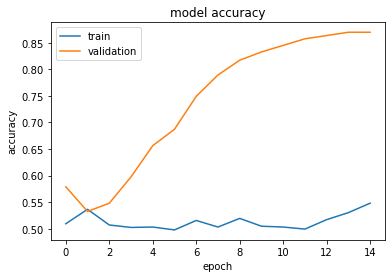

In [11]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
scores = modelo.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 460us/step - loss: 0.5680 - accuracy: 0.8911

accuracy: 89.11%


In [13]:
scores = modelo.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

41/41 [==============================] - 0s 413us/step - loss: 0.5716 - accuracy: 0.8705

accuracy: 87.05%


In [14]:
scores = modelo.evaluate(X_valid, y_valid)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

11/11 [==============================] - 0s 635us/step - loss: 0.5693 - accuracy: 0.8700

accuracy: 87.00%
